### 1. 什麼是`Callbacks`?
Callback Function(回調函數)是指在模型訓練的過程中加入的觸發事件。 \
**常用的內建`Callbacks`：**

* `CSVLogger`: 將整個訓練過程紀錄儲存成一個`.csv`的檔案。
* `ModelCheckpoint`: 建立檢查點(Checkpoint)，讓模型在檢查點自動儲存。
* `EarlyStopping`: 設定條件，當模型訓練過程滿足這個條件，就自動停止訓練。
* `ReduceLROnPlateau`: 當模型訓練的成效已無改善時，自動降低學習率。
* `TensorBoard`: 視覺化整個訓練過程的工具。

In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

### 2. 如何設定Callbacks?


In [ ]:
# 引入需要的套件
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import callbacks
import os
import datetime

#### 2.1 [CSVLogger]()

In [ ]:
folder = 'save_record'
if not os.path.exists(folder):
    os.mkdir(folder)
    
csv_path = './save_record/train_log.csv'  # 檔案儲存的位置

csvlogger = callbacks.CSVLogger(csv_path, 
                                separator=',', # 檔案中的分隔字串
                                append=False)  # 是否覆蓋已存在的檔案

#### 2.2 [ModelCheckpoint](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint)
建立檢查點(Checkpoint)，讓模型在檢查點自動儲存。

In [ ]:
folder = 'save_model'
if not os.path.exists(folder):
    os.mkdir(folder)
    
model_path = './save_model/checkpoints_model.h5'  # 模型儲存的位置

# 建立 Checkpoint
checkpoint = callbacks.ModelCheckpoint(model_path,
                                       verbose=1,
                                       monitor='val_loss',   # 儲存模型的觀察指標
                                       save_best_only=True,  # 是否只儲存最好的
                                       mode='min')           # 與指標搭配模式

#### 2.3 [EarlyStopping](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping)
設定條件，當模型訓練過程滿足這個條件，就自動停止訓練。

In [ ]:
n_patience = 5  # 訓練過程經過 n_patience 次沒有進步就不忍了
early_stopping = callbacks.EarlyStopping(monitor='val_loss',   # 停止訓練的觀察指標
                                         patience=n_patience,
                                         verbose=1)

#### 2.4 [ReduceLROnPlateau](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ReduceLROnPlateau)

當模型訓練的成效已無改善時，自動降低學習率。

In [ ]:
lr_patience = 3 # 訓練過程經過 lr_patience 次沒有進步，就會調整學習率
reduce_lr = callbacks.ReduceLROnPlateau(monitor='val_loss', # 調整學習率的觀察指標
                                        factor=0.1, # 縮放學習率的值，lr = lr*factor
                                        patience=lr_patience, 
                                        min_lr=1e-4, # 學習率縮放的最小值
                                        verbose=1,
                                        mode='min') # 與指標搭配模式

#### 2.5 [TensorBoard](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/TensorBoard)
視覺化整個訓練過程的工具。

In [ ]:
# 載入tensorboard的魔術指令
%load_ext tensorboard

In [ ]:
logdir = os.path.join('logs', 
                      datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard = callbacks.TensorBoard(logdir,             # 訓練記錄儲存的位置
                                    histogram_freq=1)   # 每一個epoch統計1次參數分布的直方圖

### 3. 用手寫辨識(MNIST)的全連結神經網路做示範

#### 3.1 由 tf.Keras 讀入 MNIST

In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
(X_train, Y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
print(f'訓練資料長度: {len(X_train)}')
print(f'測試資料長度: {len(x_test)}')

訓練資料長度: 60000
測試資料長度: 10000


#### 3.2 輸入格式整理

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
X_train = X_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [ ]:
X_train.shape

(60000, 784)

In [ ]:
x_test.shape

(10000, 784)

#### 3.3 輸出格式整理

In [ ]:
Y_train.shape

(60000,)

In [ ]:
y_test.shape

(10000,)

In [ ]:
Y_train[0]

5

做 One-hot Encoding: 

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
Y_train = to_categorical(Y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

將訓練資料再切分成訓練集和驗證集

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, 
                                                  test_size=0.4, 
                                                  shuffle=True,
                                                  random_state=520)

print(f'訓練集長度: {len(x_train)}')
print(f'驗證集長度: {len(x_val)}')

訓練集長度: 36000
驗證集長度: 24000


#### 3.4 建立模型

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()

In [ ]:
bias_initializer
kernel_initializer

In [ ]:
model.add(Dense(588, input_dim=784, activation='relu'))
model.add(Dense(294, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 588)               461580    
                                                                 
 dense_1 (Dense)             (None, 294)               173166    
                                                                 
 dense_2 (Dense)             (None, 128)               37760     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 16)                528       
                                                                 
 dense_6 (Dense)             (None, 10)                1

#### 3.5 組裝

In [ ]:
model.compile(loss='mse', 
              optimizer='sgd', 
              metrics=['accuracy'])

#### 3.6 訓練

In [ ]:
# 設定訓練參數
batch_size = 100
epochs = 100

In [ ]:
# 將所有 callbacks 用 list 包起來
callbacks_list = [csvlogger, checkpoint, early_stopping, reduce_lr, tensorboard]

In [ ]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(x_val, y_val),
                    verbose=1,
                    shuffle=True,
                    callbacks=callbacks_list) 

Epoch 1/100
344/360 [===========================>..] - ETA: 0s - loss: 0.1001 - accuracy: 0.3498
Epoch 1: val_loss improved from inf to 0.06277, saving model to ./save_model/checkpoints_model.h5
360/360 [==============================] - 5s 5ms/step - loss: 0.0984 - accuracy: 0.3586 - val_loss: 0.0628 - val_accuracy: 0.5456 - lr: 0.0100
Epoch 2/100
360/360 [==============================] - ETA: 0s - loss: 0.0533 - accuracy: 0.6115
Epoch 2: val_loss improved from 0.06277 to 0.04746, saving model to ./save_model/checkpoints_model.h5
360/360 [==============================] - 2s 4ms/step - loss: 0.0533 - accuracy: 0.6115 - val_loss: 0.0475 - val_accuracy: 0.6532 - lr: 0.0100
Epoch 3/100
359/360 [============================>.] - ETA: 0s - loss: 0.0414 - accuracy: 0.7006
Epoch 3: val_loss improved from 0.04746 to 0.03784, saving model to ./save_model/checkpoints_model.h5
360/360 [==============================] - 2s 5ms/step - loss: 0.0414 - accuracy: 0.7007 - val_loss: 0.0378 - val_accur

In [1]:
# 訓練結束後可以使用魔術指令開啟tensorboard
%tensorboard --logdir logs

UsageError: Line magic function `%tensorboard` not found.


#### 3.7 試用我們的結果

In [ ]:
from ipywidgets import interact_manual

In [ ]:
y_predict = np.argmax(model.predict(x_test), axis=-1)

In [ ]:
y_predict

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
def test(測試編號):
    plt.imshow(x_test[測試編號].reshape(28,28), cmap='Greys')
    print('神經網路判斷為:', y_predict[測試編號])

神經網路判斷為: 3


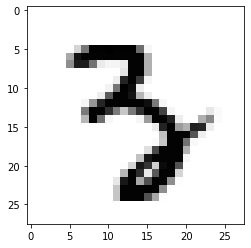

In [ ]:
test(87)

In [ ]:
interact_manual(test, 測試編號=(0, 9999))

interactive(children=(IntSlider(value=4999, description='測試編號', max=9999), Button(description='Run Interact', …

<function __main__.test>

In [ ]:
score = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0115 - accuracy: 0.9274


In [ ]:
print('loss:', score[0])
print('正確率', score[1])

loss: 0.011488819494843483
正確率 0.9273999929428101
